In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
shop=pd.read_csv('online1.csv')

In [3]:
shop.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.183993,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.219656,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.183993,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.219656,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0.0,0,0.0,10,627.500000,0.02,0.05,5.605115,...,0,0,0,0,0,0,0,0,0,1


## Model Building without Oversampling

In [4]:
shop=shop.drop('Unnamed: 0',axis=1)

In [5]:
def Models(x_train,y_train,x_test,y_test):
    
    x_train=x_train
    y_train=y_train
    x_test=x_test
    y_test=y_test

    
    print("LOGISTIC REGRESSION")
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    ypred = lg.predict(x_test)
    #confusion_matrix = confusion_matrix(y_test, ypred)
    print("------------------ Confusion matrix for Logistic:")
    print(confusion_matrix(y_test, ypred))
    print("Accuracy score for Logistic:")
    print(accuracy_score(y_test, ypred))
    print("Classification Report for Logistic report")
    print(classification_report(y_test, ypred, target_names=['Yes', 'No']))

    print("DECISION TREE")
    dt=DecisionTreeClassifier(criterion = 'gini',max_depth=4)
    dt.fit(x_train,y_train)
    ypred2=dt.predict(x_test)
    cm2=metrics.confusion_matrix(y_test,ypred2)
    print("Confusion matrix for Decision Tree:")
    print(cm2)
    acc2=metrics.accuracy_score(y_test,ypred2)
    print("Accuracy score for Decision Tree:")
    print(acc2)
    cr2=metrics.classification_report(y_test,ypred2)
    print("Classification Report for Logistic report")
    print(cr2)

    print("Naive Bayes Gaussian")
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    ypred3=gnb.predict(x_test)
    cm3=metrics.confusion_matrix(y_test,ypred3)
    print("Confusion matrix for Gaussian:")
    print(cm3)
    acc3=metrics.accuracy_score(y_test,ypred3)
    print("Accuracy score for Gaussian:")
    print(acc3)
    cr3=metrics.classification_report(y_test,ypred3)
    print("Classification Report for Gaussian")
    print(cr3)

    print("Naive Bayes Bernoulli")
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    ypred4=bnb.predict(x_test)
    cm4=metrics.confusion_matrix(y_test,ypred4)
    print("Confusion matrix for Bernoulli")
    print(cm4)
    acc4=metrics.accuracy_score(y_test,ypred4)
    print("Accuracy score for Bernoulli:")
    print(acc4)
    cr4=metrics.classification_report(y_test,ypred4)
    print("Classification Report for Bernoulli:")
    print(cr4)
    
    return

In [6]:
shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [29]:
x=shop[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
        'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor']]
y=shop['Revenue']

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [10]:
Models(xtrain,ytrain,xtest,ytest)

LOGISTIC REGRESSION


C:\Users\Jishnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------------------ Confusion matrix for Logistic:
[[3006   71]
 [ 441  181]]
Accuracy score for Logistic:
0.8615842119491754
Classification Report for Logistic report
              precision    recall  f1-score   support

         Yes       0.87      0.98      0.92      3077
          No       0.72      0.29      0.41       622

    accuracy                           0.86      3699
   macro avg       0.80      0.63      0.67      3699
weighted avg       0.85      0.86      0.84      3699

DECISION TREE
Confusion matrix for Decision Tree:
[[2995   82]
 [ 406  216]]
Accuracy score for Decision Tree:
0.8680724520140578
Classification Report for Logistic report
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      3077
        True       0.72      0.35      0.47       622

    accuracy                           0.87      3699
   macro avg       0.80      0.66      0.70      3699
weighted avg       0.85      0.87      0.85      3699

Naive B

### Model Building with Sampling

In [30]:
smt=SMOTE()
xtrain,ytrain=smt.fit_sample(xtrain,ytrain)

In [31]:
xtest,ytest=smt.fit_sample(xtest,ytest)

In [32]:
Models(xtrain,ytrain,xtest,ytest)

LOGISTIC REGRESSION
------------------ Confusion matrix for Logistic:
[[2493  584]
 [ 794 2283]]
Accuracy score for Logistic:
0.7760805979850504
Classification Report for Logistic report
              precision    recall  f1-score   support

         Yes       0.76      0.81      0.78      3077
          No       0.80      0.74      0.77      3077

    accuracy                           0.78      6154
   macro avg       0.78      0.78      0.78      6154
weighted avg       0.78      0.78      0.78      6154

DECISION TREE

C:\Users\Jishnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Confusion matrix for Decision Tree:
[[2654  423]
 [ 812 2265]]
Accuracy score for Decision Tree:
0.7993175170620734
Classification Report for Logistic report
              precision    recall  f1-score   support

       False       0.77      0.86      0.81      3077
        True       0.84      0.74      0.79      3077

    accuracy                           0.80      6154
   macro avg       0.80      0.80      0.80      6154
weighted avg       0.80      0.80      0.80      6154

Naive Bayes Gaussian
Confusion matrix for Gaussian:
[[1360 1717]
 [ 259 2818]]
Accuracy score for Gaussian:
0.6789080272993175
Classification Report for Gaussian
              precision    recall  f1-score   support

       False       0.84      0.44      0.58      3077
        True       0.62      0.92      0.74      3077

    accuracy                           0.68      6154
   macro avg       0.73      0.68      0.66      6154
weighted avg       0.73      0.68      0.66      6154

Naive Bayes Bernoulli
Con

In [33]:
shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'TotalPageVisited', 'TotalDuration',
       'TotalPageValues'],
      dtype='object')

### Feature Engineering

In [34]:
shop['TotalPageVisited']=shop['Administrative']+shop['Informational']+shop['ProductRelated']
shop['TotalDuration']=shop['Administrative_Duration']+shop['Informational_Duration']+shop['ProductRelated_Duration']
shop['TotalPageValues']=shop['TotalPageVisited']*shop['PageValues']

In [35]:
shop[['TotalPageVisited','TotalDuration','TotalPageValues','PageValues']].apply(lambda x:x==0).sum()

TotalPageVisited       6
TotalDuration        542
TotalPageValues     2234
PageValues          2234
dtype: int64

In [36]:
shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'TotalPageVisited', 'TotalDuration',
       'TotalPageValues'],
      dtype='object')

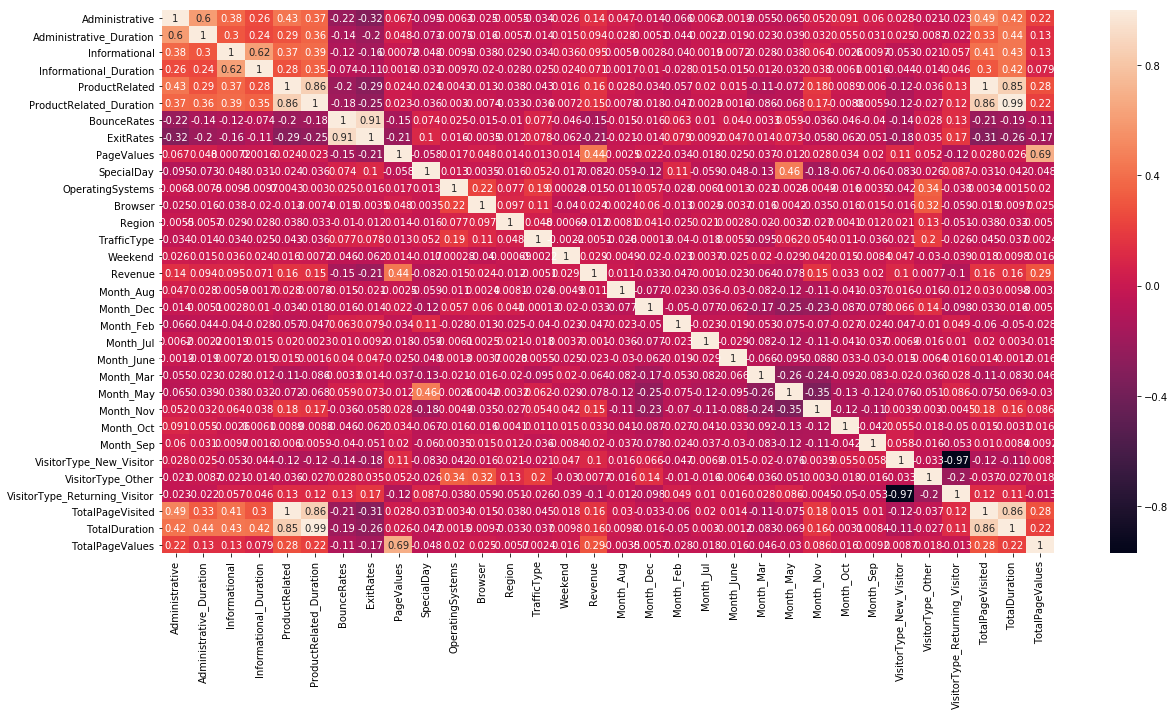

In [37]:
plt.subplots(figsize=(20,10))
sns.heatmap(shop.corr(),annot=True)

### PCA

In [41]:
x=shop[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor']]
y=shop['Revenue']

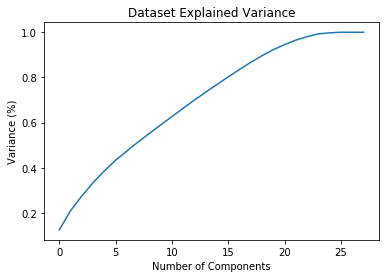

In [43]:
from sklearn.decomposition import PCA
pca=PCA().fit((sc.fit_transform(x)))
from sklearn.decomposition import  PCA
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()


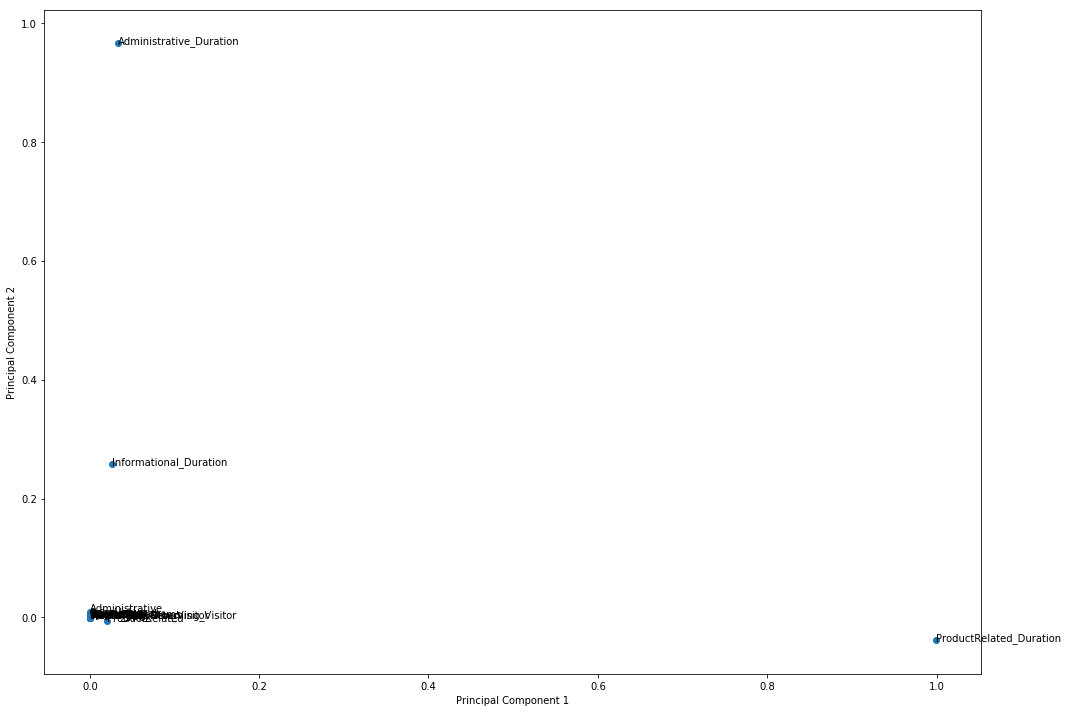

In [45]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=0)
colnames = list(x.columns)
X=x
#x,y=smt.fit_sample(x,y)
pca.fit(x)
pca.components_
colnames = list(x.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df
%matplotlib inline
fig = plt.figure(figsize = (15,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [54]:
pca.explained_variance_ratio_*100

array([9.87748098e+01, 7.53984989e-01, 4.47540359e-01, 1.37657713e-02,
       8.98658164e-03, 4.38048747e-04, 1.63530545e-04, 1.55429149e-04,
       7.77733583e-05, 2.35791499e-05, 2.02560088e-05, 7.35313780e-06,
       5.98866458e-06, 5.00788249e-06, 4.75002403e-06, 3.81481303e-06,
       1.76052164e-06, 1.11169433e-06, 9.61687936e-07, 9.42657523e-07,
       8.03622680e-07, 6.66394283e-07, 4.05806544e-07, 2.16299316e-07,
       1.00441601e-07, 4.86440248e-09, 8.31849101e-31, 8.31849101e-31])

In [61]:
pcs_df.sort_values(by='PC1',ascending=False)

,PC1,PC2,Feature
5,9.989222e-01,-3.845001e-02,ProductRelated_Duration
1,3.305343e-02,9.654720e-01,Administrative_Duration
3,2.572205e-02,2.573312e-01,Informational_Duration
4,1.999111e-02,-6.537787e-03,ProductRelated
0,6.512387e-04,1.000045e-02,Administrative
2,2.578906e-04,2.064763e-03,Informational
8,2.236556e-04,4.356684e-03,PageValues
22,3.737081e-05,-8.319928e-05,Month_Nov
27,2.209765e-05,-1.385570e-04,VisitorType_Returning_Visitor
14,1.613457e-06,4.443744e-05,Weekend


In [62]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=23)

In [64]:
xtrain=sc.fit_transform(xtrain)
df_train_pca = pca_final.fit_transform(xtrain)
df_train_pca.shape

(14690, 23)

In [65]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

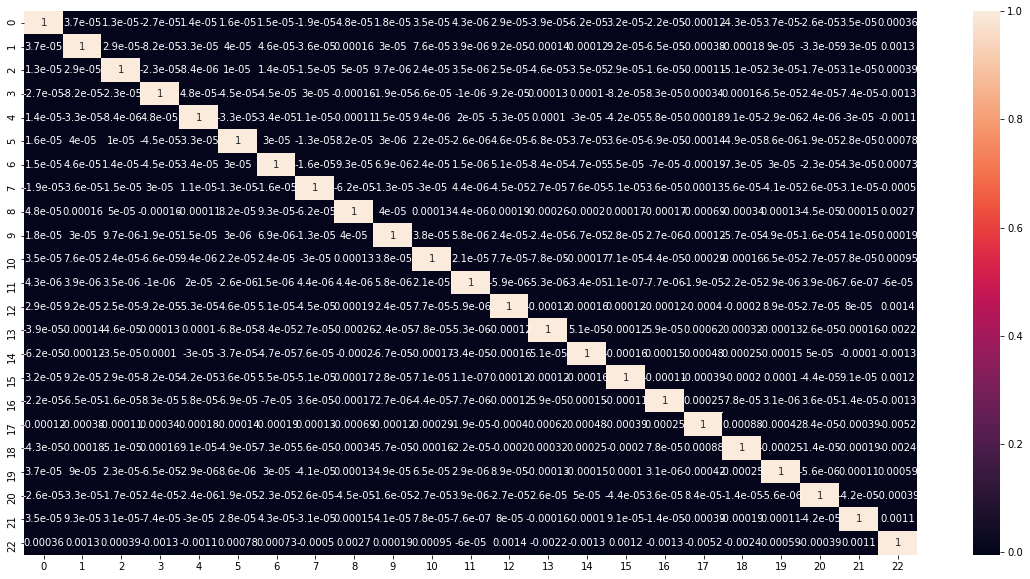

In [69]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [71]:
xtest=sc.transform(xtest)
df_train_pca = pca_final.transform(xtest)
df_train_pca.shape

(6154, 23)

In [72]:
Models(xtrain,ytrain,xtest,ytest)

LOGISTIC REGRESSION
------------------ Confusion matrix for Logistic:

C:\Users\Jishnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[[1827 1250]
 [ 192 2885]]
Accuracy score for Logistic:
0.7656808579785506
Classification Report for Logistic report
              precision    recall  f1-score   support

         Yes       0.90      0.59      0.72      3077
          No       0.70      0.94      0.80      3077

    accuracy                           0.77      6154
   macro avg       0.80      0.77      0.76      6154
weighted avg       0.80      0.77      0.76      6154

DECISION TREE
Confusion matrix for Decision Tree:
[[1342 1735]
 [ 181 2896]]
Accuracy score for Decision Tree:
0.6886577835554111
Classification Report for Logistic report
              precision    recall  f1-score   support

       False       0.88      0.44      0.58      3077
        True       0.63      0.94      0.75      3077

    accuracy                           0.69      6154
   macro avg       0.75      0.69      0.67      6154
weighted avg       0.75      0.69      0.67      6154

Naive Bayes Gaussian
Confusion matrix for Gaussian:
[[10

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.183993,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.000000,0,0.00,2,64.000000,0.000000,0.100000,0.219656,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.183993,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.000000,0,0.00,2,2.666667,0.050000,0.140000,0.219656,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.000000,0,0.00,10,627.500000,0.020000,0.050000,5.605115,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0,0.000000,0,0.00,19,154.216667,0.015789,0.024561,4.796054,0.0,...,0,0,0,0,0,0,0,0,0,1
6,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.183993,0.4,...,0,0,0,0,0,0,0,0,0,1
7,1,20.100000,0,0.00,0,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
8,0,0.000000,0,0.00,2,37.000000,0.000000,0.100000,0.219656,0.8,...,0,0,0,0,0,0,0,0,0,1
9,0,0.000000,0,0.00,3,738.000000,0.000000,0.022222,0.843937,0.4,...,0,0,0,0,0,0,0,0,0,1


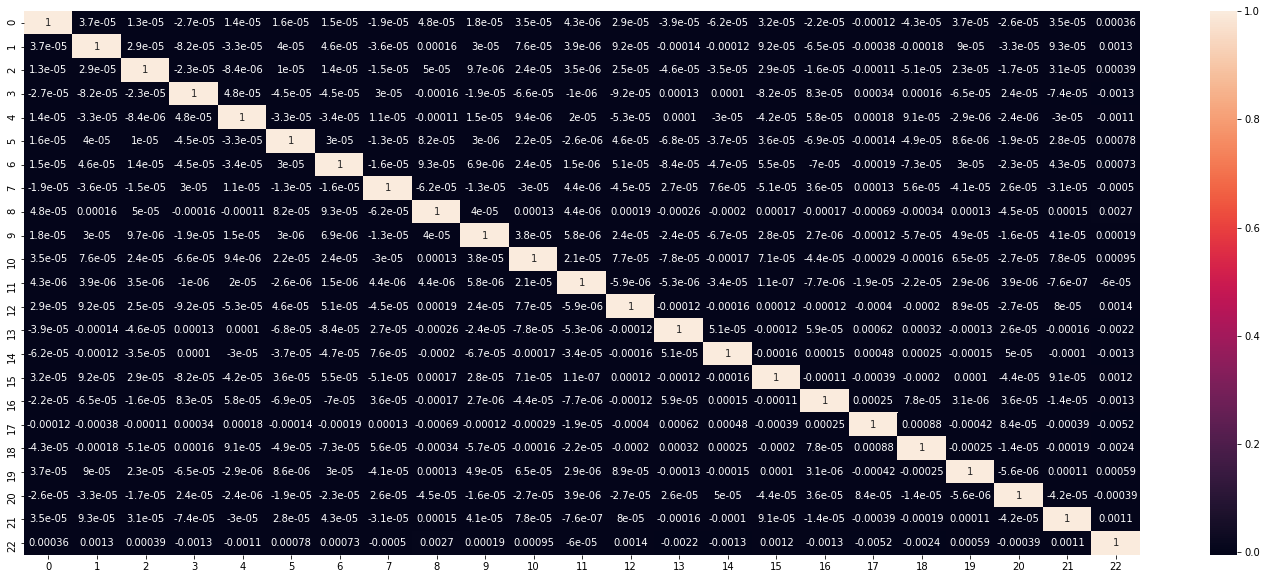

In [90]:
plt.subplots(figsize=(25,10))
sns.heatmap(pd.DataFrame(xtrain).corr(),annot=True)

In [91]:
Models(xtrain,ytrain,xtest,ytest)

LOGISTIC REGRESSION


C:\Users\Jishnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------------------ Confusion matrix for Logistic:
[[1827 1250]
 [ 202 2875]]
Accuracy score for Logistic:
0.764055898602535
Classification Report for Logistic report
              precision    recall  f1-score   support

         Yes       0.90      0.59      0.72      3077
          No       0.70      0.93      0.80      3077

    accuracy                           0.76      6154
   macro avg       0.80      0.76      0.76      6154
weighted avg       0.80      0.76      0.76      6154

DECISION TREE
Confusion matrix for Decision Tree:
[[2042 1035]
 [ 866 2211]]
Accuracy score for Decision Tree:
0.6910952226194346
Classification Report for Logistic report
              precision    recall  f1-score   support

       False       0.70      0.66      0.68      3077
        True       0.68      0.72      0.70      3077

    accuracy                           0.69      6154
   macro avg       0.69      0.69      0.69      6154
weighted avg       0.69      0.69      0.69      6154

Naive Ba

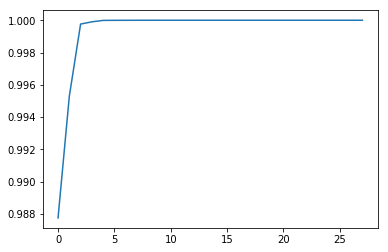

In [93]:
pca=PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [106]:
scale_x=shop[['TotalPageVisited', 'TotalDuration',
       'TotalPageValues','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor']]

In [107]:
scale_x=sc.fit_transform(scale_x)

In [108]:
covar_matrix = PCA(n_components = 25)
covar_matrix.fit(scale_x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var 

array([11. , 20.1, 27.4, 34.1, 39.9, 45.3, 50. , 54.3, 58.6, 62.8, 67. ,
       71.1, 75.2, 79.2, 83.1, 86.9, 90.2, 93.2, 95.7, 98. , 99.1, 99.6,
       99.9, 99.9, 99.9])

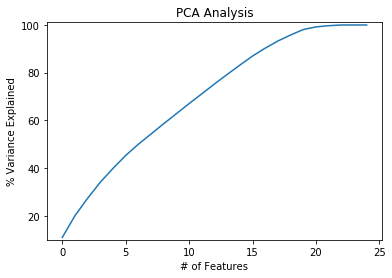

In [109]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(10,101)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [123]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
xtrain,ytrain=smt.fit_sample(xtrain,ytrain)
xtest,ytest=smt.fit_sample(xtest,ytest)
from sklearn.decomposition import IncrementalPCA
pca = PCA(n_components=19)

In [124]:
xtrain=sc.fit_transform(xtrain)
df_train_pca = pca.fit_transform(xtrain)
df_train_pca.shape

(14690, 19)

In [132]:
xtest=sc.transform(xtest)
df_test_pca=pca.transform(xtest)

In [205]:
Models(df_train_pca,ytrain,df_test_pca,ytest)

LOGISTIC REGRESSION
------------------ Confusion matrix for Logistic:
[[2464  613]
 [ 817 2260]]
Accuracy score for Logistic:
0.7676308092297692
Classification Report for Logistic report
              precision    recall  f1-score   support

         Yes       0.75      0.80      0.78      3077
          No       0.79      0.73      0.76      3077

    accuracy                           0.77      6154
   macro avg       0.77      0.77      0.77      6154
weighted avg       0.77      0.77      0.77      6154

DECISION TREE


C:\Users\Jishnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix for Decision Tree:
[[2101  976]
 [ 776 2301]]
Accuracy score for Decision Tree:
0.715307117322067
Classification Report for Logistic report
              precision    recall  f1-score   support

       False       0.73      0.68      0.71      3077
        True       0.70      0.75      0.72      3077

    accuracy                           0.72      6154
   macro avg       0.72      0.72      0.72      6154
weighted avg       0.72      0.72      0.72      6154

Naive Bayes Gaussian
Confusion matrix for Gaussian:
[[1498 1579]
 [ 518 2559]]
Accuracy score for Gaussian:
0.6592460188495287
Classification Report for Gaussian
              precision    recall  f1-score   support

       False       0.74      0.49      0.59      3077
        True       0.62      0.83      0.71      3077

    accuracy                           0.66      6154
   macro avg       0.68      0.66      0.65      6154
weighted avg       0.68      0.66      0.65      6154

Naive Bayes Bernoulli
Confu

## KFOLD with PCA Models

### KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
cv=KFold(n_splits=10,shuffle=False,random_state=0)
scores=[]
knn.fit(df_train_pca,ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [139]:
knn.score(df_train_pca,ytrain)

0.9309734513274336

In [140]:
knn.score(df_test_pca,ytest)

0.773643158921027

### SVC

In [173]:
def KFold_Model(model,pcX,pcY):
    cv=KFold(shuffle=False,random_state=0,n_splits=10)
    scores=[]



    for train_index,test_index in cv.split(pcX):
        x_train,x_test,y_train,y_test=pcX[train_index],pcX[test_index],pcY[train_index],pcY[test_index]
        model.fit(x_train,y_train)
    #    mnb.fit(x_train,y_train)

        scores.append(model.score(x_test,y_test))
    #    score_mnb(gnb.score(x_test,y_test))
    #    score_bnb.append(gnb.score(x_test,y_test))
    print('Avg score of Model:',np.mean(scores))
    #print('Avg score of Multinomial:',np.mean(score_mnb))
    #print('Avg score of Bernoulli:',np.mean(score_bnb))
    return model,scores
from sklearn.svm import SVC
model = SVC(C=1000, gamma=0.01, kernel="rbf")
model,score=KFold_Model(model,df_train_pca,ytrain)

Avg score of Model: 0.9019741320626276


In [174]:
model.score(df_test_pca,ytest)

0.8721156971075723

In [175]:
pred=model.predict(df_test_pca)

In [176]:
confusion_matrix(pred,ytest)

array([[2861,  571],
       [ 216, 2506]], dtype=int64)

In [150]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

       False       0.93      0.83      0.88      3432
        True       0.81      0.92      0.86      2722

    accuracy                           0.87      6154
   macro avg       0.87      0.88      0.87      6154
weighted avg       0.88      0.87      0.87      6154



In [183]:
pred=model.predict(df_test_pca)

In [185]:
confusion_matrix(pred,ytest)

array([[2861,  571],
       [ 216, 2506]], dtype=int64)

In [186]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

       False       0.93      0.83      0.88      3432
        True       0.81      0.92      0.86      2722

    accuracy                           0.87      6154
   macro avg       0.87      0.88      0.87      6154
weighted avg       0.88      0.87      0.87      6154



### Decision Tree

In [157]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=7)
dt.fit(df_train_pca,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [159]:
dt.score(df_train_pca,ytrain)

0.8093260721579306

In [160]:
dt.score(df_test_pca,ytest)

0.7299317517062074

In [161]:
KFold_Model(dt,df_train_pca,ytrain)

Avg score of Model: 0.7506466984343091


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 [0.7154526889040164,
  0.6929884275017019,
  0.729067392784207,
  0.7283866575901974,
  0.7031994554118448,
  0.7488087134104833,
  0.8257317903335603,
  0.7808032675289313,
  0.7903335602450646,
  0.7916950306330838])

In [162]:
dt.score(df_test_pca,ytest)

0.7307442313942152

In [163]:
dt.score(df_train_pca,ytrain)

0.8114363512593601

## Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
hyperpara={'max_depth':np.arange(2,25),'criterion':['gini','entropy']}
rfc=RandomForestClassifier(max_depth=7)

In [207]:
clf = RandomizedSearchCV(rfc, hyperpara, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [208]:
clf.fit(df_train_pca,ytrain)

C:\Users\Jishnu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 46 is smaller than n_iter=100. Running 46 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Jishnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=7,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None,
 

In [209]:
clf.score(df_train_pca,ytrain)

0.9949625595643294

In [210]:
clf.score(df_test_pca,ytest)

0.8025674358141046

In [211]:
pred=clf.predict(df_test_pca)

In [212]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

       False       0.90      0.75      0.82      3668
        True       0.71      0.87      0.78      2486

    accuracy                           0.80      6154
   macro avg       0.80      0.81      0.80      6154
weighted avg       0.82      0.80      0.80      6154



### Adaboost

In [190]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

hyperpara={'n_estimators':np.arange(3,25),'random_state':np.arange(0,25)}
ada = AdaBoostClassifier(n_estimators=7, random_state=0)
clf = RandomizedSearchCV(ada, hyperpara, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [192]:
clf.fit(df_train_pca,ytrain)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=7,
                                                random_state=0),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'n_estimators': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24]),
                                        'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [193]:
clf.score(df_train_pca,ytrain)

0.7968005445881552

In [195]:
clf.score(df_test_pca,ytest)

0.7687682807929802

In [196]:
clf.best_params_

{'random_state': 9, 'n_estimators': 24}

In [197]:
ada.fit(df_train_pca,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=7, random_state=0)

In [198]:
ada.score(df_train_pca,ytrain)

0.7358747447243023

In [199]:
ada.score(df_test_pca,ytest)

0.7227819304517387

In [201]:
pred=clf.predict(df_test_pca)
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

       False       0.79      0.76      0.77      3208
        True       0.75      0.78      0.76      2946

    accuracy                           0.77      6154
   macro avg       0.77      0.77      0.77      6154
weighted avg       0.77      0.77      0.77      6154



In [202]:
confusion_matrix(pred,ytest)

array([[2431,  777],
       [ 646, 2300]], dtype=int64)

### Bagging Classifier

In [224]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier(max_depth=7)
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=4)
#params={'max_depth':np.arange(2,30),'criterion':['gini','entropy']}
bg=BaggingClassifier(base_estimator=dt,n_estimators=50,random_state=0)
#bg.fit(df_train_pca,ytrain)
hyperpara={'base_estimator':[dt,lr,knn],'n_estimators':np.arange(1,100)}

In [225]:
clf = RandomizedSearchCV(bg, hyperpara, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [226]:
clf.fit(df_train_pca,ytrain)

KeyboardInterrupt: 

In [ ]:
clf.score(df_train_pca,ytrain)

In [ ]:
clf.score(df_test_pca,ytest)

### Gradient Boosting

In [234]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=51)
hyperpara={'n_estimators':np.arange(2,100)}
#gbcl.fit(df_train_pca,ytrain)
clf = RandomizedSearchCV(gbcl, hyperpara, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [235]:
clf.fit(df_train_pca,ytrain)

C:\Users\Jishnu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 98 is smaller than n_iter=100. Running 98 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [236]:
clf.score(df_train_pca,ytrain)

0.8712729748127979

In [238]:
clf.score(df_test_pca,ytest)

0.8173545661358466

In [239]:
pred=clf.predict(df_test_pca)

In [240]:
confusion_matrix(pred,ytest)

array([[2567,  614],
       [ 510, 2463]], dtype=int64)

In [241]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

       False       0.83      0.81      0.82      3181
        True       0.80      0.83      0.81      2973

    accuracy                           0.82      6154
   macro avg       0.82      0.82      0.82      6154
weighted avg       0.82      0.82      0.82      6154



In [243]:
pred=model.predict(df_train_pca)
confusion_matrix(pred,ytrain)

array([[7104,  739],
       [ 241, 6606]], dtype=int64)

In [244]:
print(classification_report(pred,ytrain))

              precision    recall  f1-score   support

       False       0.97      0.91      0.94      7843
        True       0.90      0.96      0.93      6847

    accuracy                           0.93     14690
   macro avg       0.93      0.94      0.93     14690
weighted avg       0.94      0.93      0.93     14690



### XGBOOSt

In [248]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [282]:
from xgboost import XGBClassifier
# fit model no training data
xgc = XGBClassifier(n_estimators=100)
xgc.fit(df_train_pca,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [283]:
xgc.score(df_train_pca,ytrain)

0.8641933287950987

In [284]:
xgc.score(df_test_pca,ytest)

0.815729606759831

In [253]:
pred=xgc.predict(df_test_pca)
confusion_matrix(pred,ytest)

array([[2551,  608],
       [ 526, 2469]], dtype=int64)

In [255]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

       False       0.83      0.81      0.82      3159
        True       0.80      0.82      0.81      2995

    accuracy                           0.82      6154
   macro avg       0.82      0.82      0.82      6154
weighted avg       0.82      0.82      0.82      6154



In [275]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [276]:
xgb3.fit(df_train_pca,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [277]:
xgb3.score(df_train_pca,ytrain)

0.9872021783526208

In [278]:
xgb3.score(df_test_pca,ytest)

0.8451413714657133

### MLP

In [285]:
from sklearn.neural_network import MLPClassifier

In [290]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=0)

In [291]:
clf.fit(df_train_pca,ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [292]:
clf.score(df_train_pca,ytrain)

0.8675289312457454

In [293]:
clf.score(df_test_pca,ytest)

0.8505037374065648

In [295]:
pred=clf.predict(df_test_pca)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

       False       0.83      0.88      0.86      3077
        True       0.87      0.82      0.85      3077

    accuracy                           0.85      6154
   macro avg       0.85      0.85      0.85      6154
weighted avg       0.85      0.85      0.85      6154



In [296]:
confusion_matrix(pred,ytest)

array([[2714,  557],
       [ 363, 2520]], dtype=int64)